In [1]:
# Standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# For interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
def load_economic_data(file_path):
    """
    Load economic data files from the provided path
    """
    try:
        data = pd.read_csv(file_path)
        print(f"Successfully loaded {file_path}")
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Define the base path for data files
base_data_path = "../../../data/economic_indicators/"

Raw GDP Data:
    Year  Agriculture  Mining & Quarrying  Manufacturing  Electricity & Water Supply
0  2019         1744                  52           2122                         939
1  2020         1820                  54           2195                         958
2  2021         1900                  57           2290                         985
3  2022         2071                  60           2400                        1002
4  2023         2171                  62           2525                        1045

Total GDP (Summed over years): 9706.00

Processed GDP Data:
    Year  Agriculture  Mining & Quarrying  Manufacturing  Electricity & Water Supply  GDP Growth Rate (%)
0  2019         1744                  52           2122                         939                  NaN
1  2020         1820                  54           2195                         958             4.357798
2  2021         1900                  57           2290                         985             4.395604

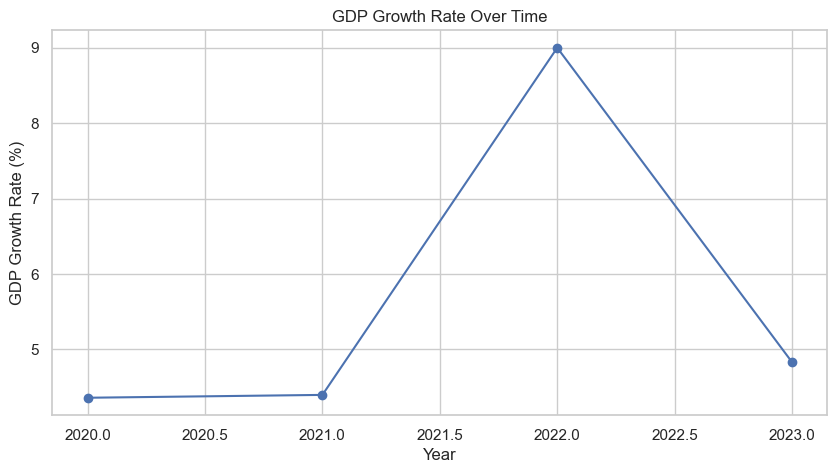

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_1_Gross_Domestic_Product_by_Activity__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load GDP data
gdp_data = load_economic_data(file_path)

# Check if the data loaded successfully
if gdp_data is not None:
    # Display first few rows of the dataset
    print("Raw GDP Data:\n", gdp_data.head())

    # Ensure the Year column is of integer type and GDP values are numeric
    gdp_data.rename(columns={gdp_data.columns[0]: 'Year'}, inplace=True)  # Rename the first column to 'Year' if necessary
    gdp_data['Year'] = gdp_data['Year'].astype(int)
    
    # Convert GDP values to numeric (assuming GDP is in the second column)
    gdp_column = gdp_data.columns[1]  # Get the GDP column name
    gdp_data[gdp_column] = pd.to_numeric(gdp_data[gdp_column], errors='coerce')

    # Calculate total GDP (sum across all activities, if applicable)
    total_gdp = gdp_data[gdp_column].sum()
    print(f"\nTotal GDP (Summed over years): {total_gdp:.2f}")

    # Calculate GDP growth rate
    gdp_data['GDP Growth Rate (%)'] = gdp_data[gdp_column].pct_change() * 100

    # Display processed data
    print("\nProcessed GDP Data:\n", gdp_data)

    # Plot GDP growth over time
    plt.figure(figsize=(10, 5))
    plt.plot(gdp_data['Year'], gdp_data['GDP Growth Rate (%)'], marker='o', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth Rate (%)')
    plt.title('GDP Growth Rate Over Time')
    plt.grid(True)
    plt.show()

else:
    print("Failed to load GDP data.")


<Figure size 1400x800 with 0 Axes>

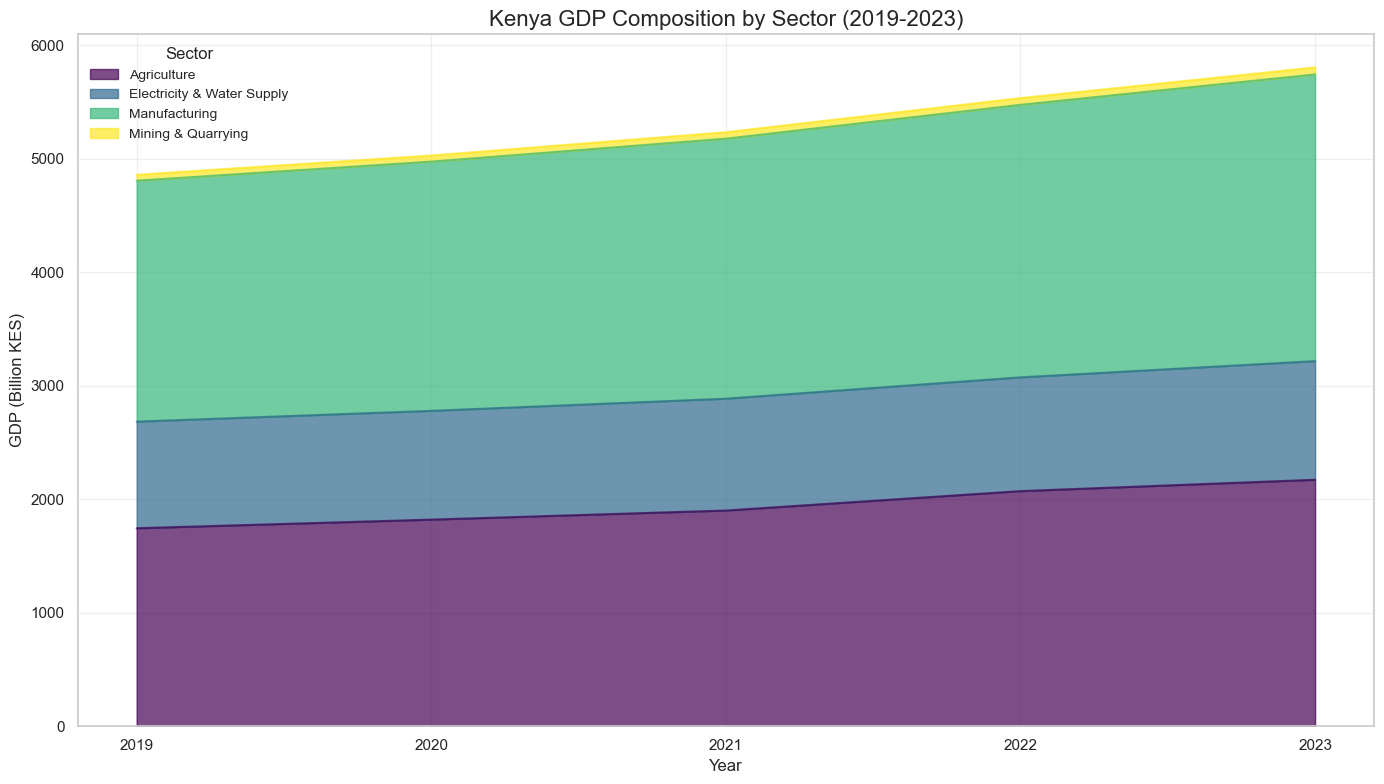

In [4]:
# GDP Sector Analysis 
# Melt the GDP data for better visualization
gdp_melted = pd.melt(gdp_data, id_vars=['Year'], 
                     value_vars=gdp_data.columns[1:5],
                     var_name='Sector', value_name='Value')

# Create a stacked area chart for sector growth
plt.figure(figsize=(14, 8))
sectors = gdp_melted['Sector'].unique()

# Pivot the data for area chart
gdp_pivot = gdp_melted.pivot(index='Year', columns='Sector', values='Value')

# Plot the stacked area chart
gdp_pivot.plot.area(stacked=True, alpha=0.7, figsize=(14, 8), 
                     colormap='viridis')

plt.title('Kenya GDP Composition by Sector (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (Billion KES)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Sector', loc='upper left', fontsize=10)
plt.xticks(gdp_data['Year'])
plt.tight_layout()
plt.show()

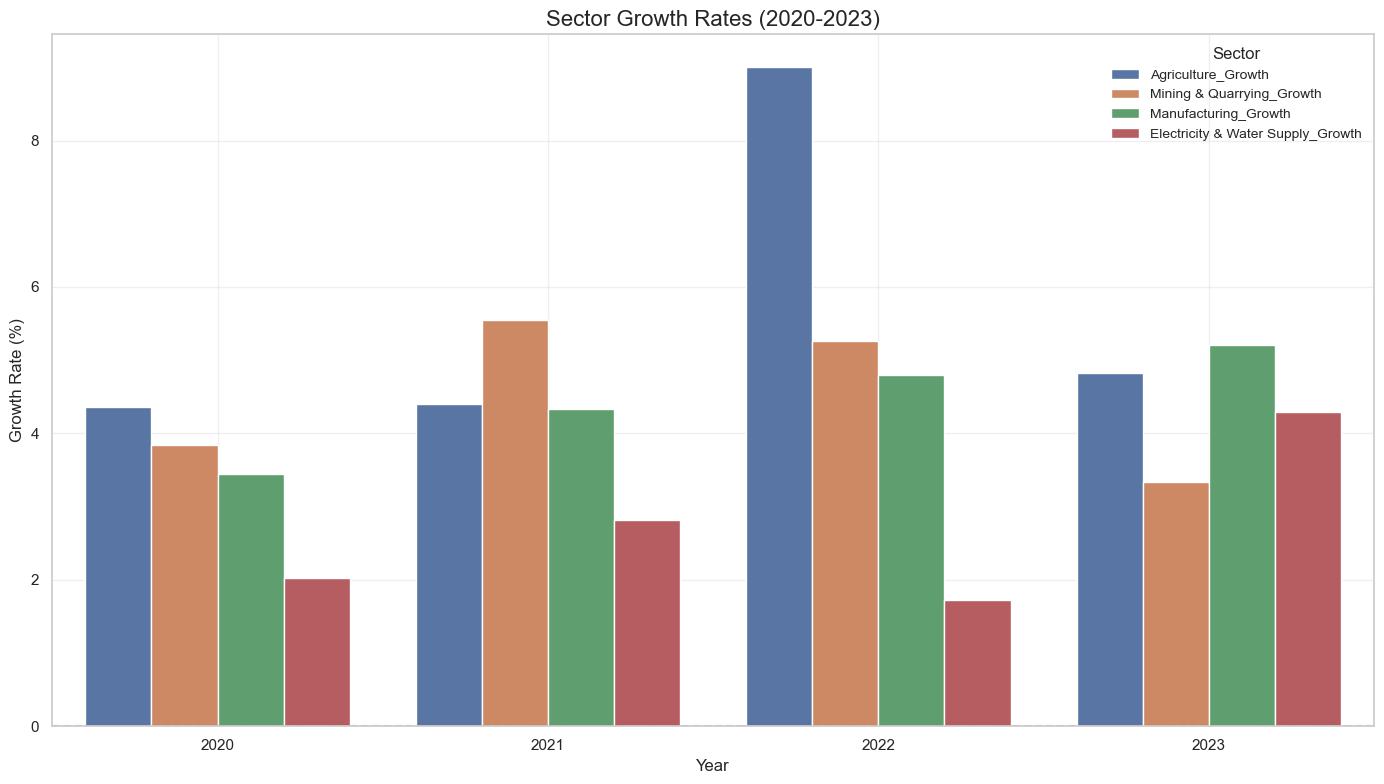

In [8]:
# Calculate sector growth rates
sector_growth = pd.DataFrame()
sector_growth['Year'] = gdp_data['Year'][1:]

for sector in gdp_data.columns[1:5]:
    sector_growth[f"{sector}_Growth"] = gdp_data[sector].pct_change() * 100

# Create a grouped bar chart for sector growth rates
sector_growth_melted = pd.melt(sector_growth, id_vars=['Year'], 
                              var_name='Sector', value_name='Growth_Rate')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Year', y='Growth_Rate', hue='Sector', data=sector_growth_melted)
plt.title('Sector Growth Rates (2020-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend(title='Sector', fontsize=10)
plt.tight_layout()
plt.show()

Raw Monetary Data:
    Year  Broad Money (M3) (KSh Billion)  Reserve Money (KSh Billion)  Interest Rate (%)
0  2019                            3600                          500                9.5
1  2020                            3700                          520                9.0
2  2021                            3800                          540                8.5
3  2022                            3900                          550                8.8
4  2023                            4000                          580                9.2


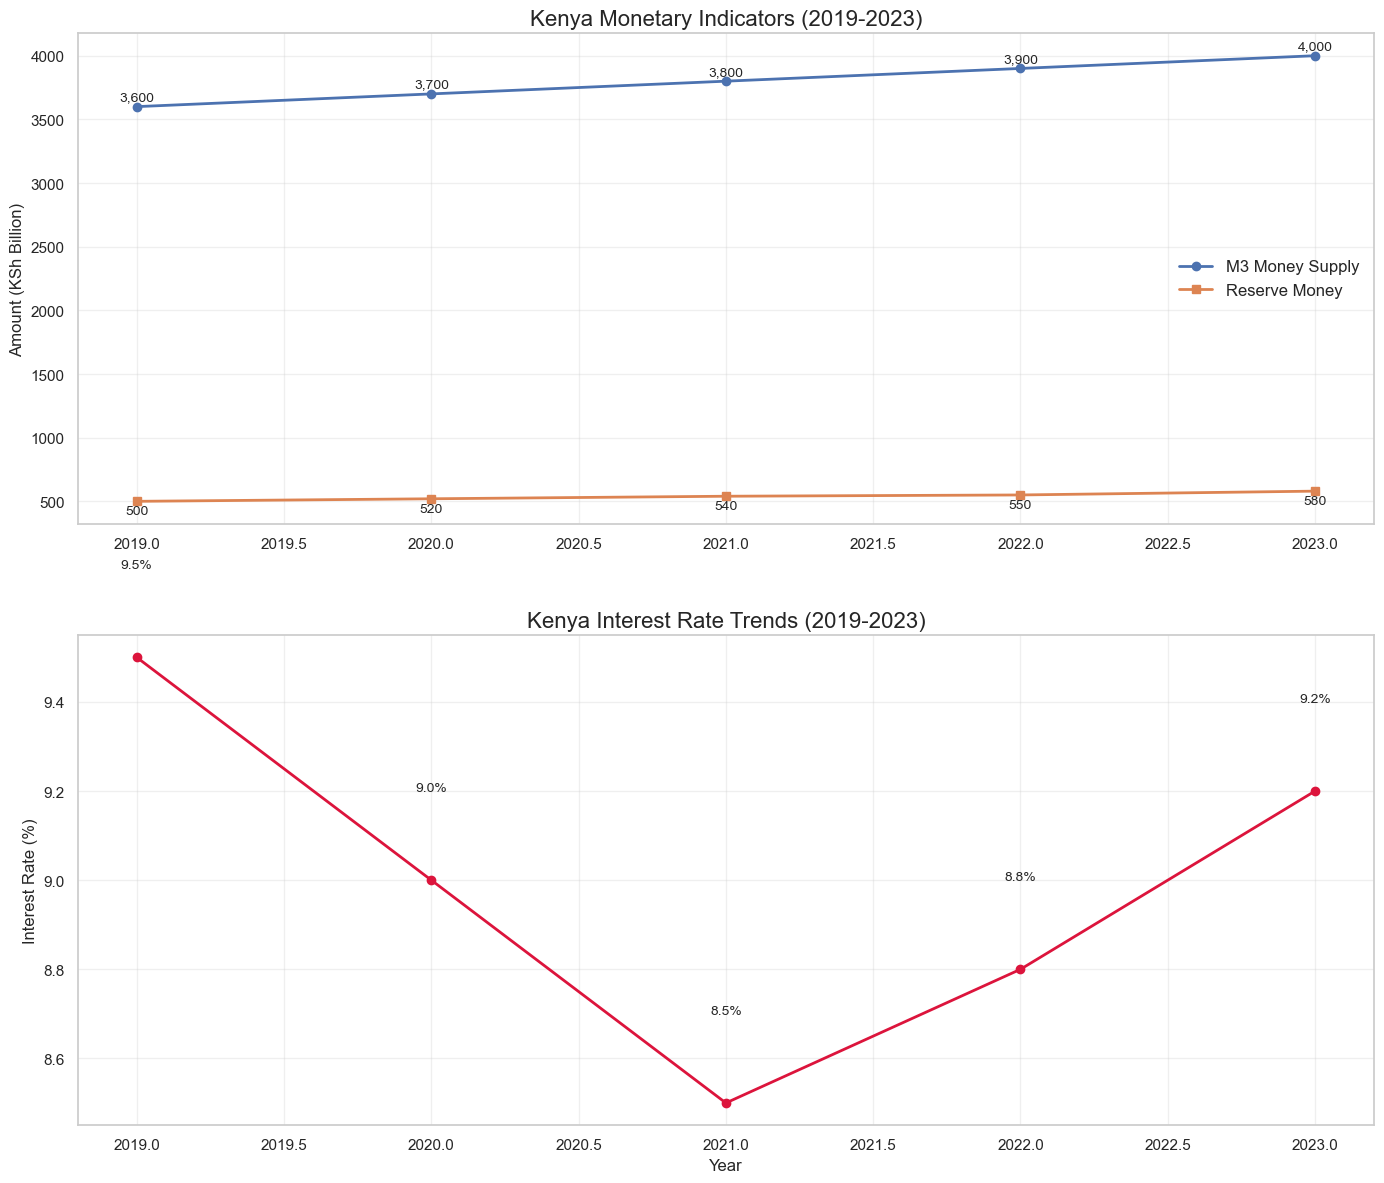

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_22__Selected_Monetary_Indicators__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load monetary data
monetary_data = load_economic_data(file_path)

# Check if data is loaded successfully
if monetary_data is not None:
    # Display first few rows of the dataset
    print("Raw Monetary Data:\n", monetary_data.head())

    # Ensure the Year column is of integer type
    monetary_data.rename(columns={monetary_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    monetary_data['Year'] = monetary_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    monetary_data['Broad Money (M3) (KSh Billion)'] = pd.to_numeric(monetary_data['Broad Money (M3) (KSh Billion)'], errors='coerce')
    monetary_data['Reserve Money (KSh Billion)'] = pd.to_numeric(monetary_data['Reserve Money (KSh Billion)'], errors='coerce')
    monetary_data['Interest Rate (%)'] = pd.to_numeric(monetary_data['Interest Rate (%)'], errors='coerce')
    
    # Calculate money supply growth rate
    monetary_data['M3_Growth_Rate'] = monetary_data['Broad Money (M3) (KSh Billion)'].pct_change() * 100
    monetary_data['Reserve_Growth_Rate'] = monetary_data['Reserve Money (KSh Billion)'].pct_change() * 100
    
    # Visualize monetary indicators
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
    
    # Plot money supply and reserve money
    ax1.plot(monetary_data['Year'], monetary_data['Broad Money (M3) (KSh Billion)'], marker='o', linewidth=2, label='M3 Money Supply')
    ax1.plot(monetary_data['Year'], monetary_data['Reserve Money (KSh Billion)'], marker='s', linewidth=2, label='Reserve Money')
    ax1.set_title('Kenya Monetary Indicators (2019-2023)', fontsize=16)
    ax1.set_ylabel('Amount (KSh Billion)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    
    # Annotate values
    for i, v in enumerate(monetary_data['Broad Money (M3) (KSh Billion)']):
        ax1.text(monetary_data['Year'][i], v + 50, f"{v:,}", ha='center', fontsize=10)
    
    for i, v in enumerate(monetary_data['Reserve Money (KSh Billion)']):
        ax1.text(monetary_data['Year'][i], v - 100, f"{v:,}", ha='center', fontsize=10)
    
    # Plot interest rates
    ax2.plot(monetary_data['Year'], monetary_data['Interest Rate (%)'], marker='o', linewidth=2, color='crimson')
    ax2.set_title('Kenya Interest Rate Trends (2019-2023)', fontsize=16)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Interest Rate (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # Annotate interest rates
    for i, v in enumerate(monetary_data['Interest Rate (%)']):
        ax2.text(monetary_data['Year'][i], v + 0.2, f"{v}%", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load monetary data.")


<Figure size 1400x800 with 0 Axes>

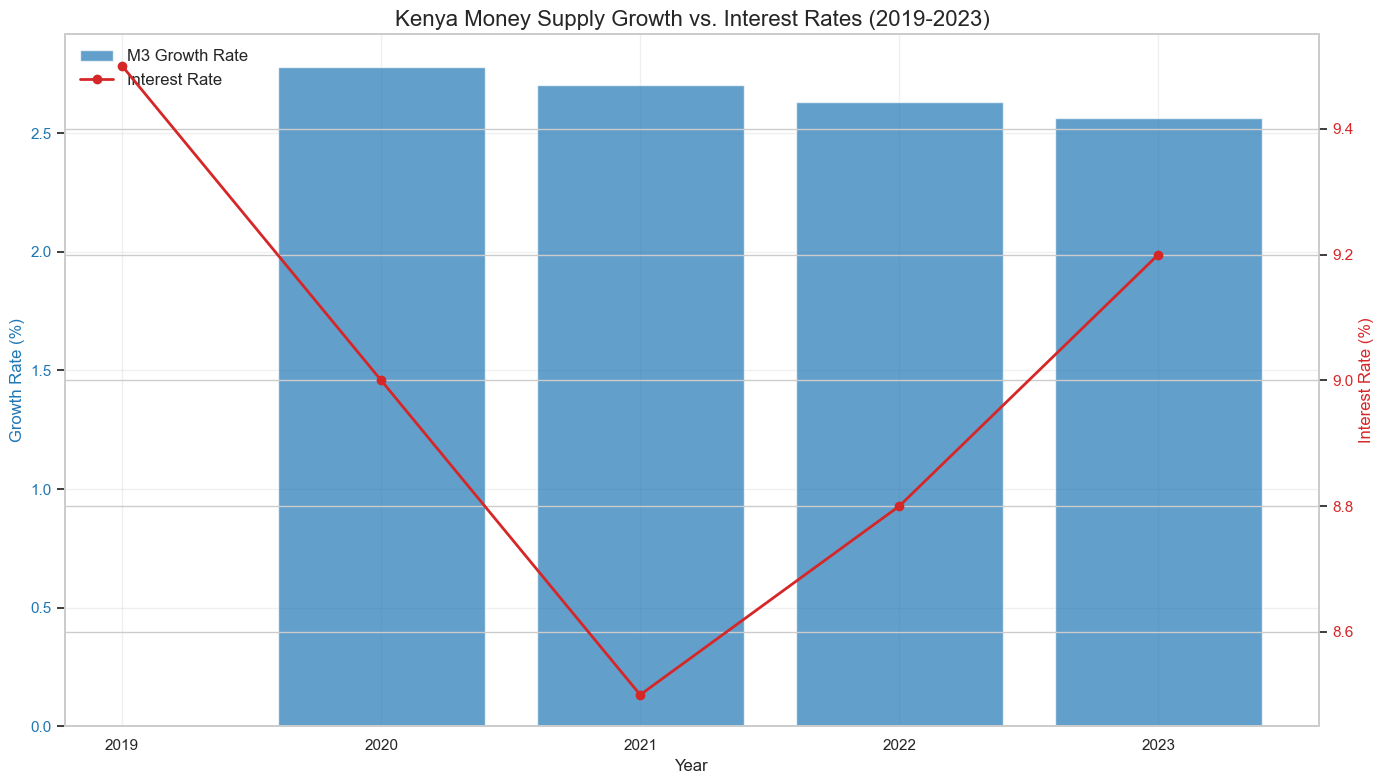

In [10]:
# Create a dual axis chart for money growth and interest rates
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Growth Rate (%)', color=color, fontsize=12)
ax1.bar(monetary_data['Year'][1:], monetary_data['M3_Growth_Rate'][1:], color=color, alpha=0.7, label='M3 Growth Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()  # Create a second y-axis

color = 'tab:red'
ax2.set_ylabel('Interest Rate (%)', color=color, fontsize=12)
ax2.plot(monetary_data['Year'], monetary_data['Interest Rate (%)'], color=color, marker='o', linewidth=2, label='Interest Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Kenya Money Supply Growth vs. Interest Rates (2019-2023)', fontsize=16)

# Create combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

fig.tight_layout()
plt.show()

In [11]:
# International Trade Analysis
import os
import pandas as pd

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_17__Balance_of_Merchandise_Trade__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load trade balance data
trade_data = load_economic_data(file_path)

# Check if data is loaded successfully
if trade_data is not None:
    # Display first few rows of the dataset
    print("Raw Trade Data:\n", trade_data.head())
    
    # Ensure the Year column is of integer type
    trade_data.rename(columns={trade_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    trade_data['Year'] = trade_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    trade_data['Exports (KSh Billion)'] = pd.to_numeric(trade_data['Exports (KSh Billion)'], errors='coerce')
    trade_data['Imports (KSh Billion)'] = pd.to_numeric(trade_data['Imports (KSh Billion)'], errors='coerce')
    
    # Calculate trade coverage ratio (exports as a percentage of imports)
    trade_data['Trade_Coverage_Ratio'] = (trade_data['Exports (KSh Billion)'] / trade_data['Imports (KSh Billion)']) * 100
    
    # Calculate export and import growth rates
    trade_data['Export_Growth'] = trade_data['Exports (KSh Billion)'].pct_change() * 100
    trade_data['Import_Growth'] = trade_data['Imports (KSh Billion)'].pct_change() * 100
    
    # Display processed data
    print("\nProcessed Trade Data:\n", trade_data)
else:
    print("Failed to load trade data.")


Raw Trade Data:
    Year  Exports (KSh Billion)  Imports (KSh Billion)  Trade Balance (KSh Billion)
0  2019                    599                   1700                        -1101
1  2020                    564                   1650                        -1086
2  2021                    642                   1850                        -1208
3  2022                    707                   2100                        -1393
4  2023                    782                   2275                        -1493

Processed Trade Data:
    Year  Exports (KSh Billion)  Imports (KSh Billion)  Trade Balance (KSh Billion)  Trade_Coverage_Ratio  Export_Growth  Import_Growth
0  2019                    599                   1700                        -1101             35.235294            NaN            NaN
1  2020                    564                   1650                        -1086             34.181818      -5.843072      -2.941176
2  2021                    642                   1850   

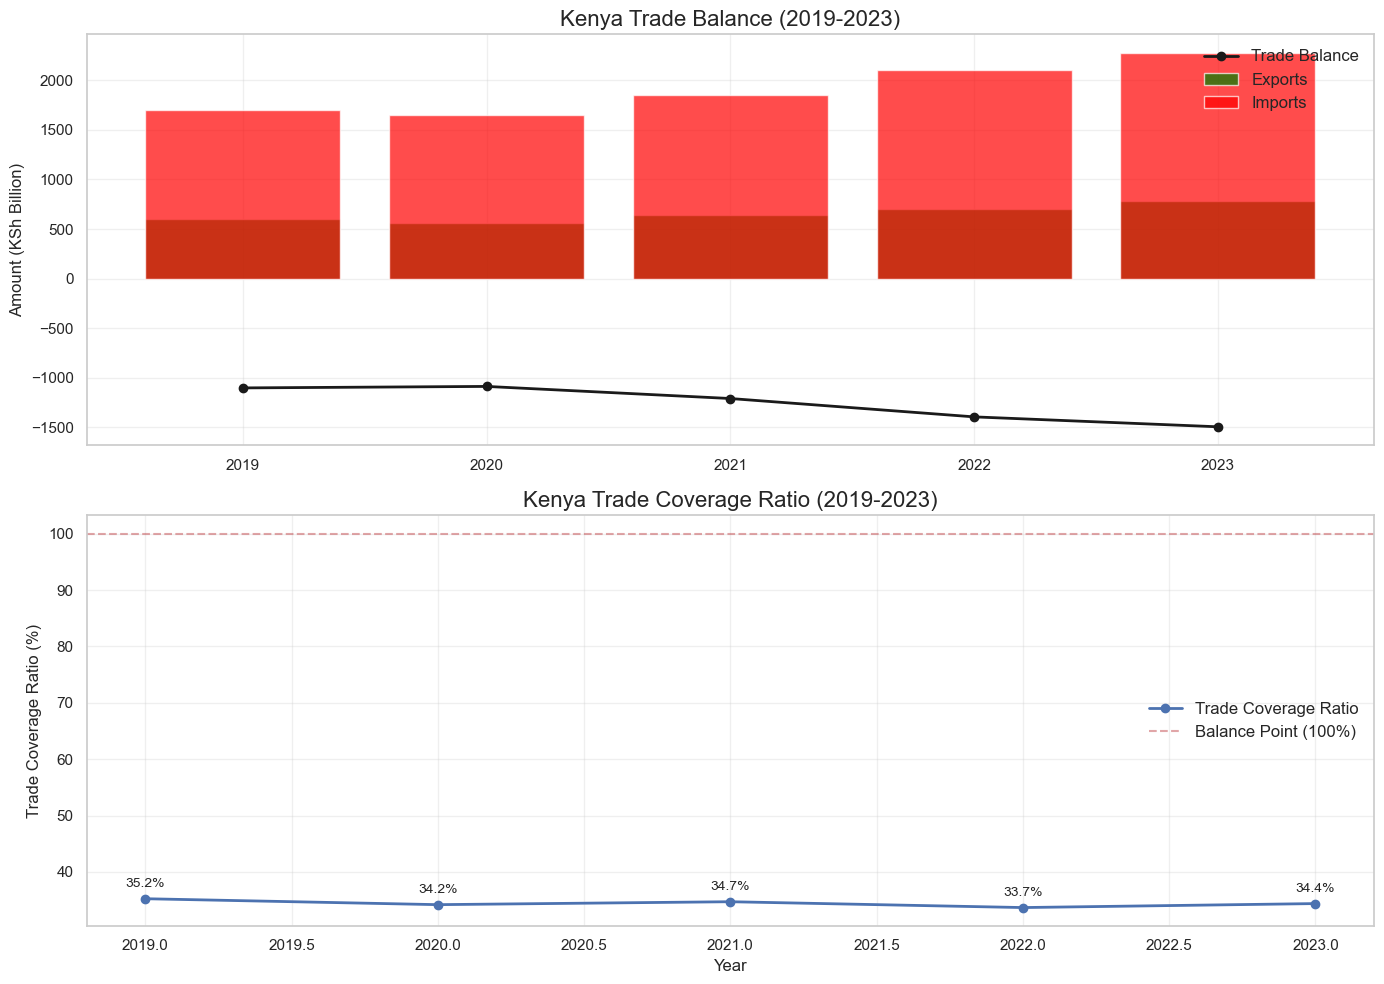

In [12]:
# Visualize trade balance
plt.figure(figsize=(14, 10))

# Plot 1: Trade Balance
plt.subplot(2, 1, 1)
plt.bar(trade_data['Year'], trade_data['Exports (KSh Billion)'], color='green', alpha=0.7, label='Exports')
plt.bar(trade_data['Year'], trade_data['Imports (KSh Billion)'], color='red', alpha=0.7, label='Imports')
plt.plot(trade_data['Year'], trade_data['Trade Balance (KSh Billion)'], 'ko-', linewidth=2, label='Trade Balance')
plt.title('Kenya Trade Balance (2019-2023)', fontsize=16)
plt.ylabel('Amount (KSh Billion)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Plot 2: Trade Coverage Ratio
plt.subplot(2, 1, 2)
plt.plot(trade_data['Year'], trade_data['Trade_Coverage_Ratio'], 'bo-', linewidth=2)
plt.axhline(y=100, color='r', linestyle='--', alpha=0.5, label='Balance Point (100%)')
plt.title('Kenya Trade Coverage Ratio (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trade Coverage Ratio (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(['Trade Coverage Ratio', 'Balance Point (100%)'], fontsize=12)

# Annotate coverage ratio
for i, v in enumerate(trade_data['Trade_Coverage_Ratio']):
    plt.text(trade_data['Year'][i], v + 2, f"{v:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Raw Export Data:
    Year  Tea (Tonnes)  Coffee (Tonnes)  Horticultural Products (Tonnes)
0  2019        400000            50000                           250000
1  2020        410000            52000                           260000
2  2021        420000            54000                           270000
3  2022        430000            56000                           280000
4  2023        440000            58000                           290000


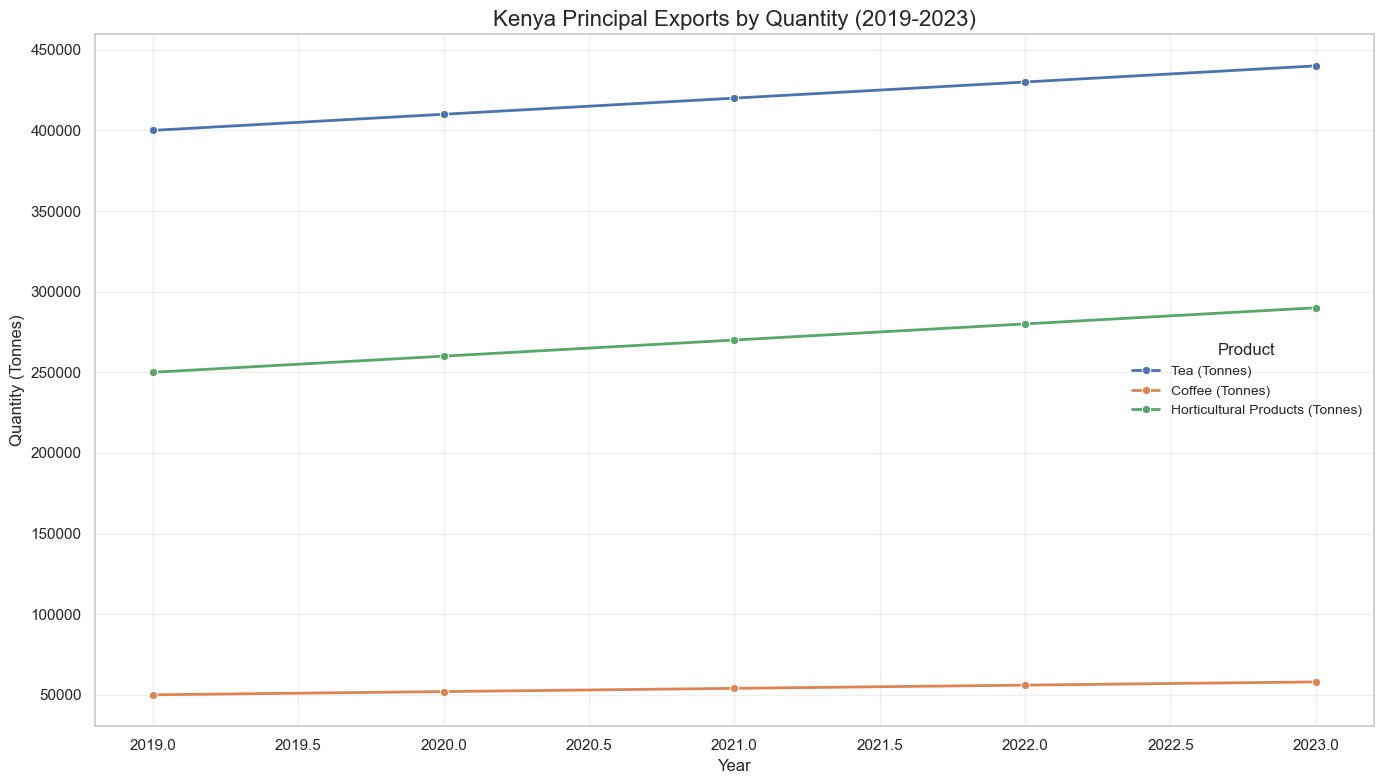

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_23__Quantities_of_Principal_Domestic_Exports__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load export data by product
export_data = load_economic_data(file_path)

# Check if data is loaded successfully
if export_data is not None:
    # Display first few rows of the dataset
    print("Raw Export Data:\n", export_data.head())
    
    # Ensure the Year column is of integer type
    export_data.rename(columns={export_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    export_data['Year'] = export_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    for col in export_data.columns[1:]:
        export_data[col] = pd.to_numeric(export_data[col], errors='coerce')
    
    # Reshape data for visualization
    export_melted = pd.melt(export_data, id_vars=['Year'], 
                            value_vars=export_data.columns[1:], 
                            var_name='Product', value_name='Quantity')
    
    # Visualize export composition
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=export_melted, x='Year', y='Quantity', hue='Product', marker='o', linewidth=2)
    plt.title('Kenya Principal Exports by Quantity (2019-2023)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Quantity (Tonnes)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Product', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to load export data.")


In [14]:
# Employment and Labor Market Analysis
# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_21__Total_Recorded_Employment__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load employment data
employment_data = load_economic_data(file_path)

# Check if data is loaded successfully
if employment_data is not None:
    # Display first few rows of the dataset
    print("Raw Employment Data:\n", employment_data.head())
    
    # Ensure the Year column is of integer type
    employment_data.rename(columns={employment_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    employment_data['Year'] = employment_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    employment_data['Total Employment (Million)'] = pd.to_numeric(employment_data['Total Employment (Million)'], errors='coerce')
    employment_data['Wage Employment (Million)'] = pd.to_numeric(employment_data['Wage Employment (Million)'], errors='coerce')
    employment_data['Self-Employed and Unpaid Family Workers (Million)'] = pd.to_numeric(employment_data['Self-Employed and Unpaid Family Workers (Million)'], errors='coerce')
    
    # Calculate employment growth rates
    employment_data['Total_Growth'] = employment_data['Total Employment (Million)'].pct_change() * 100
    employment_data['Wage_Growth'] = employment_data['Wage Employment (Million)'].pct_change() * 100
    employment_data['Self_Employed_Growth'] = employment_data['Self-Employed and Unpaid Family Workers (Million)'].pct_change() * 100
    
    # Display processed data
    print("\nProcessed Employment Data:\n", employment_data)
else:
    print("Failed to load employment data.")

Raw Employment Data:
    Year  Total Employment (Million)  Wage Employment (Million)  Self-Employed and Unpaid Family Workers (Million)
0  2019                        18.0                        3.0                                               0.16
1  2020                        18.5                        3.1                                               0.17
2  2021                        19.0                        3.2                                               0.18
3  2022                        19.5                        3.0                                               0.17
4  2023                        20.0                        3.1                                               0.17

Processed Employment Data:
    Year  Total Employment (Million)  Wage Employment (Million)  Self-Employed and Unpaid Family Workers (Million)  Total_Growth  Wage_Growth  Self_Employed_Growth
0  2019                        18.0                        3.0                                        

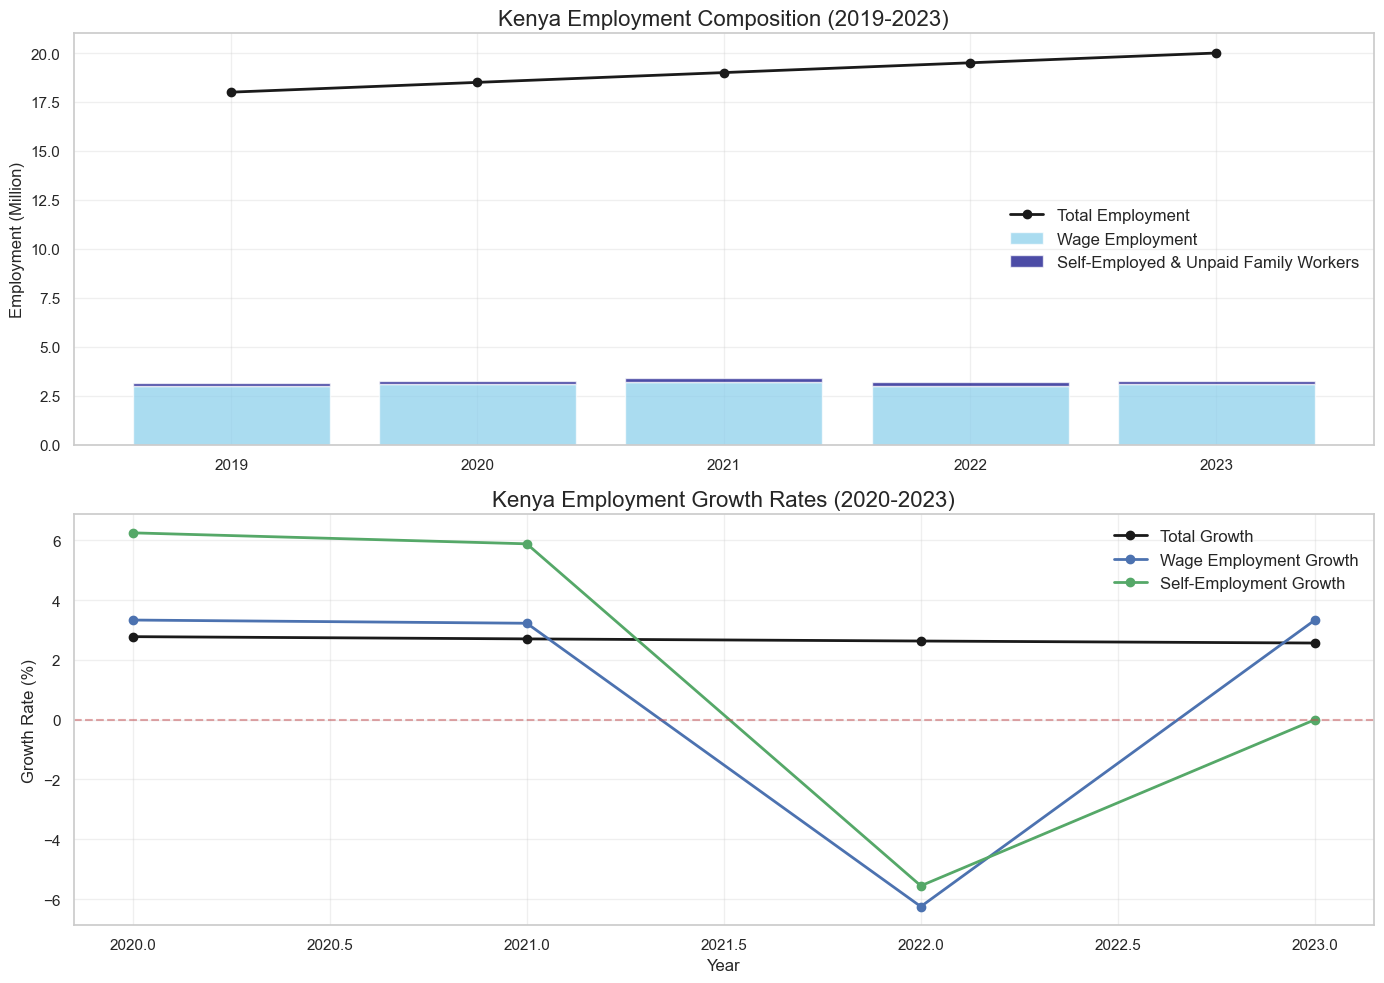

In [15]:
# Visualize employment trends
plt.figure(figsize=(14, 10))

# Plot 1: Employment by category
plt.subplot(2, 1, 1)
plt.bar(employment_data['Year'], employment_data['Wage Employment (Million)'], 
        color='skyblue', alpha=0.7, label='Wage Employment')
plt.bar(employment_data['Year'], employment_data['Self-Employed and Unpaid Family Workers (Million)'], 
        bottom=employment_data['Wage Employment (Million)'], 
        color='navy', alpha=0.7, label='Self-Employed & Unpaid Family Workers')
plt.plot(employment_data['Year'], employment_data['Total Employment (Million)'], 
         'ko-', linewidth=2, label='Total Employment')
plt.title('Kenya Employment Composition (2019-2023)', fontsize=16)
plt.ylabel('Employment (Million)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Plot 2: Employment Growth Rates
plt.subplot(2, 1, 2)
plt.plot(employment_data['Year'][1:], employment_data['Total_Growth'][1:], 'ko-', linewidth=2, label='Total Growth')
plt.plot(employment_data['Year'][1:], employment_data['Wage_Growth'][1:], 'bo-', linewidth=2, label='Wage Employment Growth')
plt.plot(employment_data['Year'][1:], employment_data['Self_Employed_Growth'][1:], 'go-', linewidth=2, 
         label='Self-Employment Growth')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.title('Kenya Employment Growth Rates (2020-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
# Foreign Exchange and Oil Prices Analysis
# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_47__Average_Murban_ADNOC_OPEC_Reference_Basket_Prices__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load oil price data
oil_price_data = load_economic_data(file_path)

# Check if data is loaded successfully
if oil_price_data is not None:
    # Display first few rows of the dataset
    print("Raw Oil Price Data:\n", oil_price_data.head())
    
    # Ensure the Year column is of integer type
    oil_price_data.rename(columns={oil_price_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    oil_price_data['Year'] = oil_price_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    oil_price_data['Murban ADNOC Price (USD per Barrel)'] = pd.to_numeric(oil_price_data['Murban ADNOC Price (USD per Barrel)'], errors='coerce')
    oil_price_data['OPEC Basket Price (USD per Barrel)'] = pd.to_numeric(oil_price_data['OPEC Basket Price (USD per Barrel)'], errors='coerce')
    
    # Calculate oil price changes
    oil_price_data['Murban_Change'] = oil_price_data['Murban ADNOC Price (USD per Barrel)'].pct_change() * 100
    oil_price_data['OPEC_Change'] = oil_price_data['OPEC Basket Price (USD per Barrel)'].pct_change() * 100
    
    # Display processed data
    print("\nProcessed Oil Price Data:\n", oil_price_data)
else:
    print("Failed to load oil price data.")

Raw Oil Price Data:
    Year  Murban ADNOC Price (USD per Barrel)  OPEC Basket Price (USD per Barrel)
0  2019                                 65.2                                64.0
1  2020                                 41.5                                41.0
2  2021                                 69.4                                70.3
3  2022                                 96.5                                97.2
4  2023                                 88.2                                89.0

Processed Oil Price Data:
    Year  Murban ADNOC Price (USD per Barrel)  OPEC Basket Price (USD per Barrel)  Murban_Change  OPEC_Change
0  2019                                 65.2                                64.0            NaN          NaN
1  2020                                 41.5                                41.0     -36.349693   -35.937500
2  2021                                 69.4                                70.3      67.228916    71.463415
3  2022                      

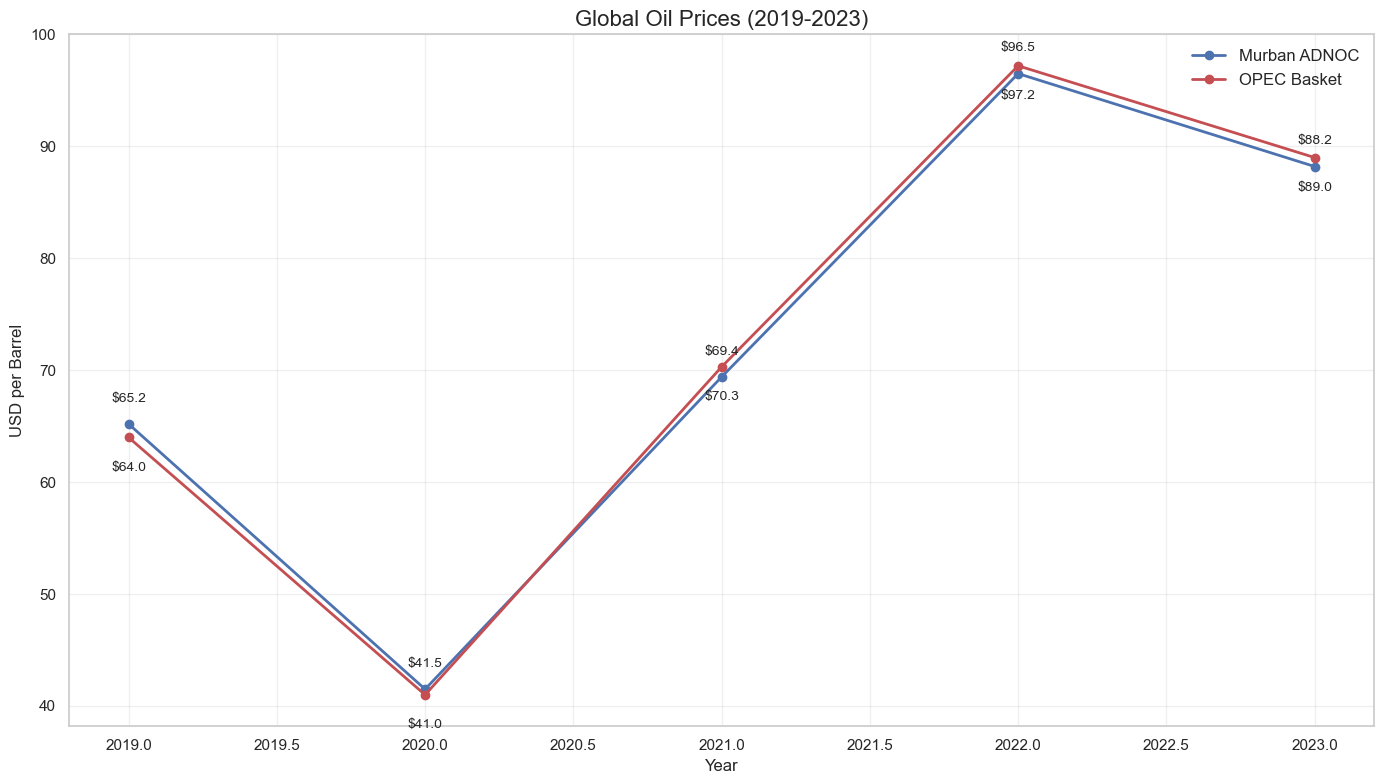

In [17]:
# Visualize oil prices
plt.figure(figsize=(14, 8))

plt.plot(oil_price_data['Year'], oil_price_data['Murban ADNOC Price (USD per Barrel)'], 
         'bo-', linewidth=2, label='Murban ADNOC')
plt.plot(oil_price_data['Year'], oil_price_data['OPEC Basket Price (USD per Barrel)'], 
         'ro-', linewidth=2, label='OPEC Basket')
plt.title('Global Oil Prices (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('USD per Barrel', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Annotate prices
for i, v in enumerate(oil_price_data['Murban ADNOC Price (USD per Barrel)']):
    plt.text(oil_price_data['Year'][i], v + 2, f"${v}", ha='center', fontsize=10)

for i, v in enumerate(oil_price_data['OPEC Basket Price (USD per Barrel)']):
    plt.text(oil_price_data['Year'][i], v - 3, f"${v}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [18]:
import os
import pandas as pd

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_6__Manufacturing_Output__Compensation_of_Employees_and_Value_Added__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load manufacturing data
manufacturing_data = load_economic_data(file_path)

# Check if data is loaded successfully
if manufacturing_data is not None:
    # Display first few rows of the dataset
    print("Raw Manufacturing Data:\n", manufacturing_data.head())
    
    # Ensure the Year column is of integer type
    manufacturing_data.rename(columns={manufacturing_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    manufacturing_data['Year'] = manufacturing_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    manufacturing_data['Value of Output (KSh Million)'] = pd.to_numeric(manufacturing_data['Value of Output (KSh Million)'], errors='coerce')
    manufacturing_data['Value Added (KSh Million)'] = pd.to_numeric(manufacturing_data['Value Added (KSh Million)'], errors='coerce')
    manufacturing_data['Compensation of Employees (KSh Million)'] = pd.to_numeric(manufacturing_data['Compensation of Employees (KSh Million)'], errors='coerce')
    
    # Calculate growth rates for manufacturing
    manufacturing_data['Output_Growth'] = manufacturing_data['Value of Output (KSh Million)'].pct_change() * 100
    manufacturing_data['Value_Added_Growth'] = manufacturing_data['Value Added (KSh Million)'].pct_change() * 100
    manufacturing_data['Employee_Comp_Growth'] = manufacturing_data['Compensation of Employees (KSh Million)'].pct_change() * 100
    
    # Calculate value added ratio
    manufacturing_data['Value_Added_Ratio'] = (manufacturing_data['Value Added (KSh Million)'] / 
                                               manufacturing_data['Value of Output (KSh Million)']) * 100
    
    # Display processed data
    print("\nProcessed Manufacturing Data:\n", manufacturing_data)
else:
    print("Failed to load manufacturing data.")


Raw Manufacturing Data:
    Year  Value of Output (KSh Million)  Intermediate Consumption (KSh Million)  Value Added (KSh Million)  Compensation of Employees (KSh Million)
0  2019                        2311586                                 1502333                     809253                                   218255
1  2020                        2376423                                 1562095                     814328                                   215492
2  2021                        2700161                                 1814529                     885633                                   231411
3  2022                        3168615                                 2124424                    1044191                                   258418
4  2023                        3583250                                 2434387                    1148863                                   283098

Processed Manufacturing Data:
    Year  Value of Output (KSh Million)  Intermediate Consumpt

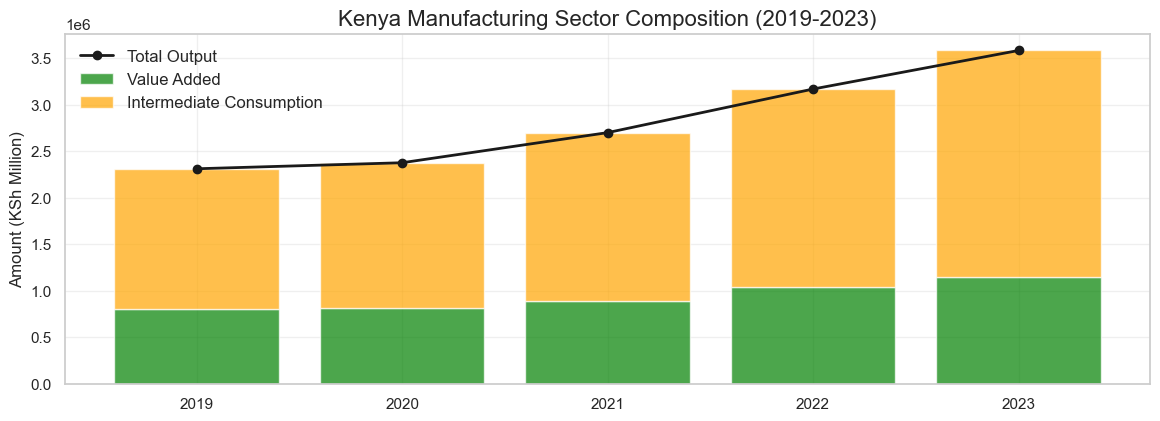

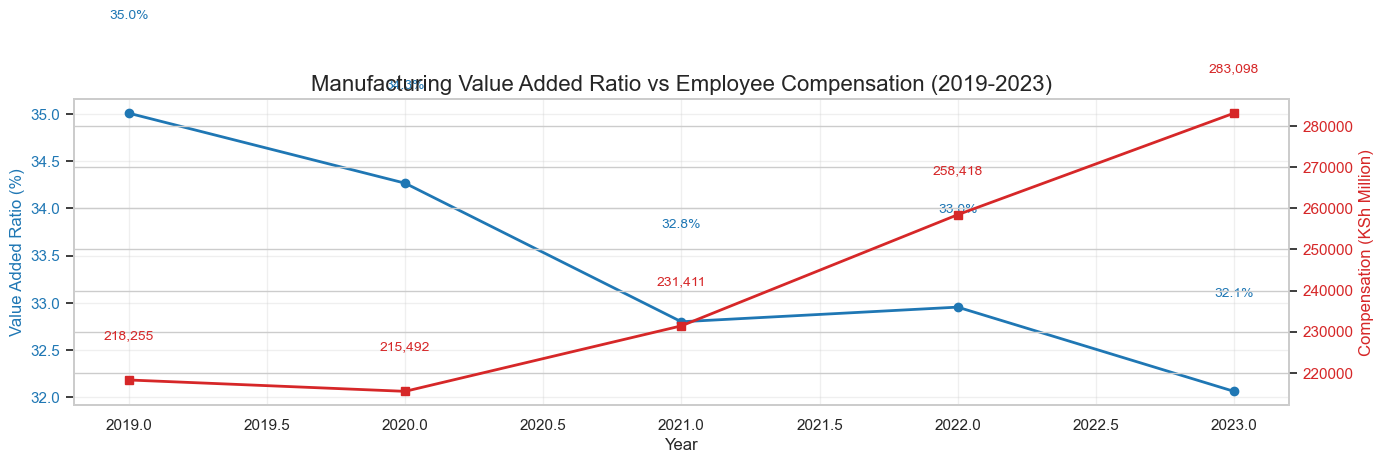

In [19]:
# Visualize manufacturing trends
plt.figure(figsize=(14, 10))

# Plot 1: Manufacturing output, value added and intermediate consumption
plt.subplot(2, 1, 1)
plt.bar(manufacturing_data['Year'], manufacturing_data['Value Added (KSh Million)'], 
        color='green', alpha=0.7, label='Value Added')
plt.bar(manufacturing_data['Year'], manufacturing_data['Intermediate Consumption (KSh Million)'], 
        bottom=manufacturing_data['Value Added (KSh Million)'], 
        color='orange', alpha=0.7, label='Intermediate Consumption')
plt.plot(manufacturing_data['Year'], manufacturing_data['Value of Output (KSh Million)'], 
         'ko-', linewidth=2, label='Total Output')
plt.title('Kenya Manufacturing Sector Composition (2019-2023)', fontsize=16)
plt.ylabel('Amount (KSh Million)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Plot 2: Value added ratio and employee compensation
fig, ax1 = plt.subplots(figsize=(14, 5))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Value Added Ratio (%)', color=color, fontsize=12)
ax1.plot(manufacturing_data['Year'], manufacturing_data['Value_Added_Ratio'], color=color, marker='o', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Annotate value added ratio
for i, v in enumerate(manufacturing_data['Value_Added_Ratio']):
    ax1.text(manufacturing_data['Year'][i], v + 1, f"{v:.1f}%", ha='center', fontsize=10, color=color)

ax2 = ax1.twinx()  # Create a second y-axis

color = 'tab:red'
ax2.set_ylabel('Compensation (KSh Million)', color=color, fontsize=12)
ax2.plot(manufacturing_data['Year'], manufacturing_data['Compensation of Employees (KSh Million)'], 
         color=color, marker='s', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Annotate employee compensation
for i, v in enumerate(manufacturing_data['Compensation of Employees (KSh Million)']):
    ax2.text(manufacturing_data['Year'][i], v + 10000, f"{v:,}", ha='center', fontsize=10, color=color)

plt.title('Manufacturing Value Added Ratio vs Employee Compensation (2019-2023)', fontsize=16)
fig.tight_layout()
plt.show()

In [20]:
import os
import pandas as pd

# Define the correct path to the dataset
file_path = "C:/xampp/htdocs/PesaGuru/notebooks/data/external/macroeconomic_data/Table_52__Employment__Investment__and_Revenue_in_ICT_Sector__2019-2023_.csv"

# Function to load data with error handling
def load_economic_data(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

# Load ICT sector data
ict_data = load_economic_data(file_path)

# Check if data is loaded successfully
if ict_data is not None:
    # Display first few rows of the dataset
    print("Raw ICT Data:\n", ict_data.head())
    
    # Ensure the Year column is of integer type
    ict_data.rename(columns={ict_data.columns[0]: 'Year'}, inplace=True)  # Rename first column to 'Year' if necessary
    ict_data['Year'] = ict_data['Year'].astype(int)
    
    # Convert numeric columns to appropriate types
    ict_data['Total ICT Sector Employment'] = pd.to_numeric(ict_data['Total ICT Sector Employment'], errors='coerce')
    ict_data['Total ICT Investment (KSh Billion)'] = pd.to_numeric(ict_data['Total ICT Investment (KSh Billion)'], errors='coerce')
    ict_data['Total ICT Revenue (KSh Billion)'] = pd.to_numeric(ict_data['Total ICT Revenue (KSh Billion)'], errors='coerce')
    
    # Calculate growth rates for ICT sector
    ict_data['Employment_Growth'] = ict_data['Total ICT Sector Employment'].pct_change() * 100
    ict_data['Investment_Growth'] = ict_data['Total ICT Investment (KSh Billion)'].pct_change() * 100
    ict_data['Revenue_Growth'] = ict_data['Total ICT Revenue (KSh Billion)'].pct_change() * 100
    
    # Calculate ROI ratio (revenue to investment)
    ict_data['ROI_Ratio'] = ict_data['Total ICT Revenue (KSh Billion)'] / ict_data['Total ICT Investment (KSh Billion)']
    
    # Display processed data
    print("\nProcessed ICT Data:\n", ict_data)
else:
    print("Failed to load ICT data.")

Raw ICT Data:
    Year  Total ICT Sector Employment  Total ICT Investment (KSh Billion)  Total ICT Revenue (KSh Billion)
0  2019                       250000                                  40                              180
1  2020                       260000                                  42                              190
2  2021                       270000                                  45                              200
3  2022                       280000                                  48                              210
4  2023                       290000                                  50                              220

Processed ICT Data:
    Year  Total ICT Sector Employment  Total ICT Investment (KSh Billion)  Total ICT Revenue (KSh Billion)  Employment_Growth  Investment_Growth  Revenue_Growth  ROI_Ratio
0  2019                       250000                                  40                              180                NaN                NaN             

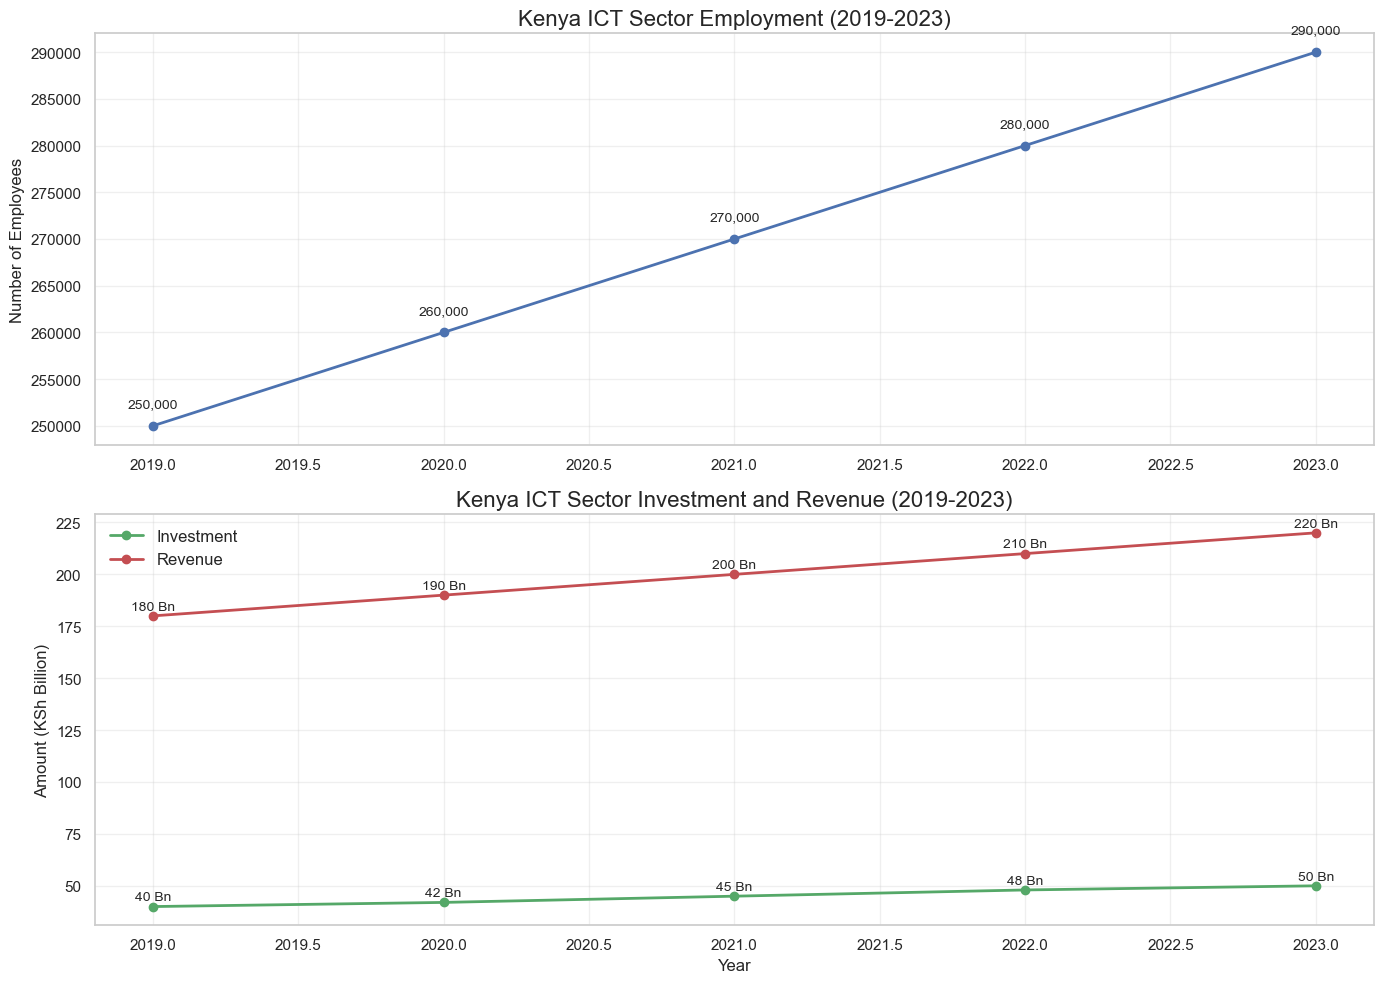

In [21]:
# Visualize ICT sector trends
plt.figure(figsize=(14, 10))

# Plot 1: ICT Employment Trend
plt.subplot(2, 1, 1)
plt.plot(ict_data['Year'], ict_data['Total ICT Sector Employment'], 'bo-', linewidth=2)
plt.title('Kenya ICT Sector Employment (2019-2023)', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate employment numbers
for i, v in enumerate(ict_data['Total ICT Sector Employment']):
    plt.text(ict_data['Year'][i], v + 2000, f"{v:,}", ha='center', fontsize=10)

# Plot 2: ICT Investment and Revenue
plt.subplot(2, 1, 2)
plt.plot(ict_data['Year'], ict_data['Total ICT Investment (KSh Billion)'], 'go-', linewidth=2, label='Investment')
plt.plot(ict_data['Year'], ict_data['Total ICT Revenue (KSh Billion)'], 'ro-', linewidth=2, label='Revenue')
plt.title('Kenya ICT Sector Investment and Revenue (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (KSh Billion)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Annotate investment and revenue values
for i, v in enumerate(ict_data['Total ICT Investment (KSh Billion)']):
    plt.text(ict_data['Year'][i], v + 3, f"{v} Bn", ha='center', fontsize=10)
    
for i, v in enumerate(ict_data['Total ICT Revenue (KSh Billion)']):
    plt.text(ict_data['Year'][i], v + 3, f"{v} Bn", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

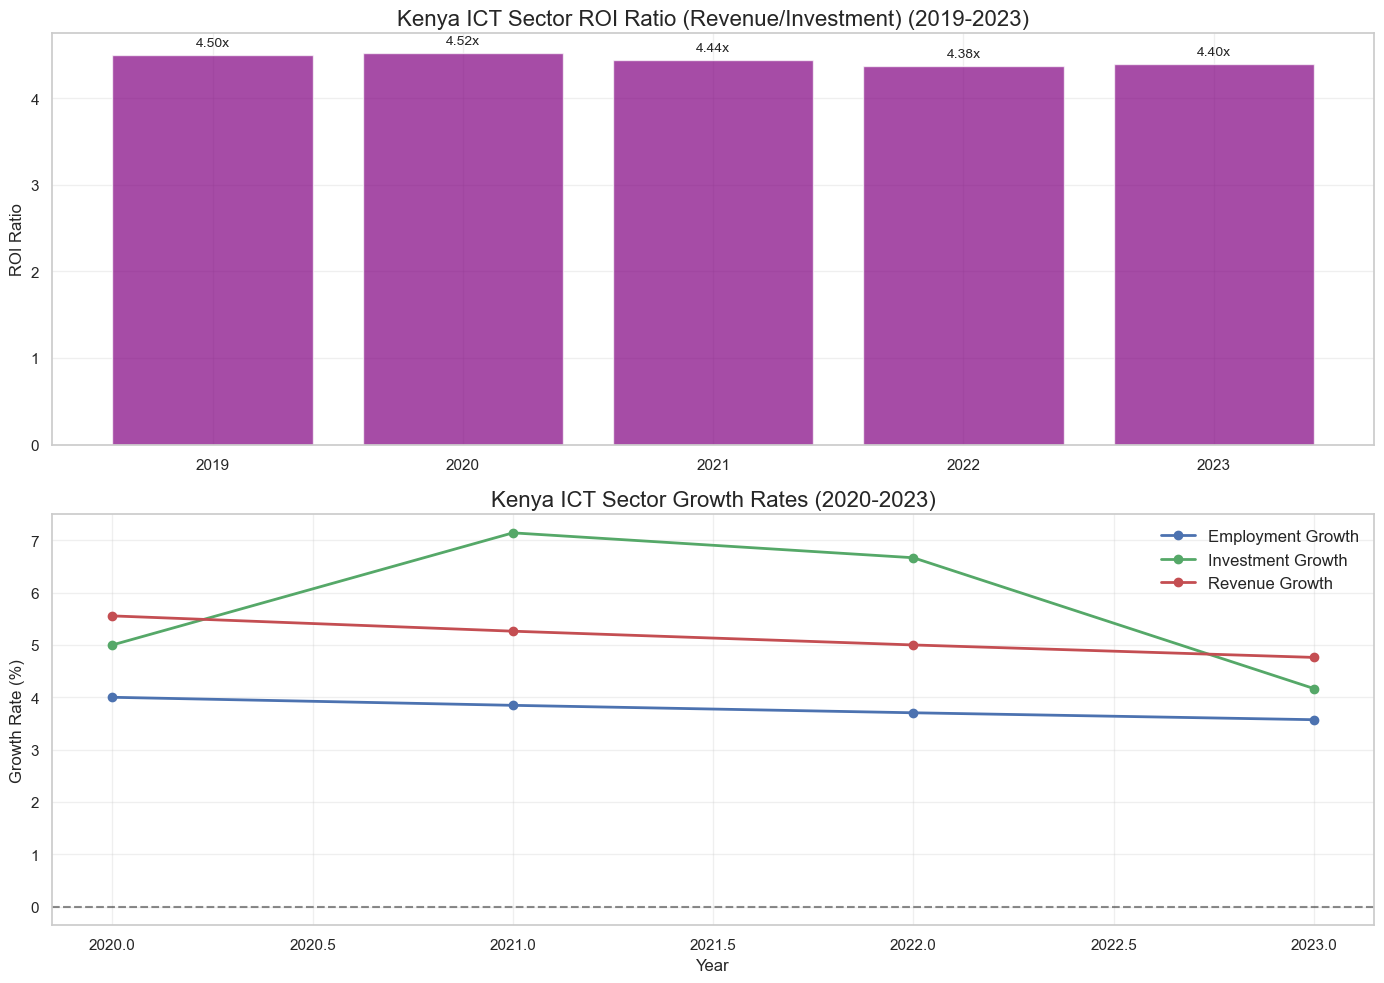

In [22]:
# Visualize ICT ROI and Growth Rates
plt.figure(figsize=(14, 10))

# Plot 1: ROI Ratio
plt.subplot(2, 1, 1)
plt.bar(ict_data['Year'], ict_data['ROI_Ratio'], color='purple', alpha=0.7)
plt.title('Kenya ICT Sector ROI Ratio (Revenue/Investment) (2019-2023)', fontsize=16)
plt.ylabel('ROI Ratio', fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate ROI values
for i, v in enumerate(ict_data['ROI_Ratio']):
    plt.text(ict_data['Year'][i], v + 0.1, f"{v:.2f}x", ha='center', fontsize=10)

# Plot 2: Growth Rates
plt.subplot(2, 1, 2)
plt.plot(ict_data['Year'][1:], ict_data['Employment_Growth'][1:], 'bo-', linewidth=2, label='Employment Growth')
plt.plot(ict_data['Year'][1:], ict_data['Investment_Growth'][1:], 'go-', linewidth=2, label='Investment Growth')
plt.plot(ict_data['Year'][1:], ict_data['Revenue_Growth'][1:], 'ro-', linewidth=2, label='Revenue Growth')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.title('Kenya ICT Sector Growth Rates (2020-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
# Correlation Analysis of Key Indicators
# Create a combined dataframe with key indicators for correlation analysis
# First, ensure all dataframes have data for the same years
years = list(set(gdp_data['Year']) & set(monetary_data['Year']) & set(trade_data['Year']) & 
             set(employment_data['Year']) & set(oil_price_data['Year']))
years.sort()

# Create correlation dataframe
corr_data = pd.DataFrame()
corr_data['Year'] = years

# Add key indicators
for year in years:
    # GDP
    if 'Total_GDP' in gdp_data.columns:
        corr_data.loc[corr_data['Year'] == year, 'GDP_Total'] = gdp_data.loc[gdp_data['Year'] == year, 'Total_GDP'].values[0]
    
    if 'GDP_Growth_Rate' in gdp_data.columns:
        gdp_growth = gdp_data.loc[gdp_data['Year'] == year, 'GDP_Growth_Rate']
        if not gdp_growth.empty and not pd.isna(gdp_growth.values[0]):
            corr_data.loc[corr_data['Year'] == year, 'GDP_Growth'] = gdp_growth.values[0]
    
    # Monetary
    corr_data.loc[corr_data['Year'] == year, 'Interest_Rate'] = monetary_data.loc[monetary_data['Year'] == year, 'Interest Rate (%)'].values[0]
    corr_data.loc[corr_data['Year'] == year, 'M3_Money_Supply'] = monetary_data.loc[monetary_data['Year'] == year, 'Broad Money (M3) (KSh Billion)'].values[0]
    
    # Trade
    corr_data.loc[corr_data['Year'] == year, 'Exports'] = trade_data.loc[trade_data['Year'] == year, 'Exports (KSh Billion)'].values[0]
    corr_data.loc[corr_data['Year'] == year, 'Imports'] = trade_data.loc[trade_data['Year'] == year, 'Imports (KSh Billion)'].values[0]
    corr_data.loc[corr_data['Year'] == year, 'Trade_Balance'] = trade_data.loc[trade_data['Year'] == year, 'Trade Balance (KSh Billion)'].values[0]
    
    # Employment
    corr_data.loc[corr_data['Year'] == year, 'Total_Employment'] = employment_data.loc[employment_data['Year'] == year, 'Total Employment (Million)'].values[0]
    
    # Oil Price
    corr_data.loc[corr_data['Year'] == year, 'Oil_Price'] = oil_price_data.loc[oil_price_data['Year'] == year, 'OPEC Basket Price (USD per Barrel)'].values[0]

corr_data

,Year,Interest_Rate,M3_Money_Supply,Exports,Imports,Trade_Balance,Total_Employment,Oil_Price
0,2019,9.5,3600.0,599.0,1700.0,-1101.0,18.0,64.0
1,2020,9.0,3700.0,564.0,1650.0,-1086.0,18.5,41.0
2,2021,8.5,3800.0,642.0,1850.0,-1208.0,19.0,70.3
3,2022,8.8,3900.0,707.0,2100.0,-1393.0,19.5,97.2
4,2023,9.2,4000.0,782.0,2275.0,-1493.0,20.0,89.0


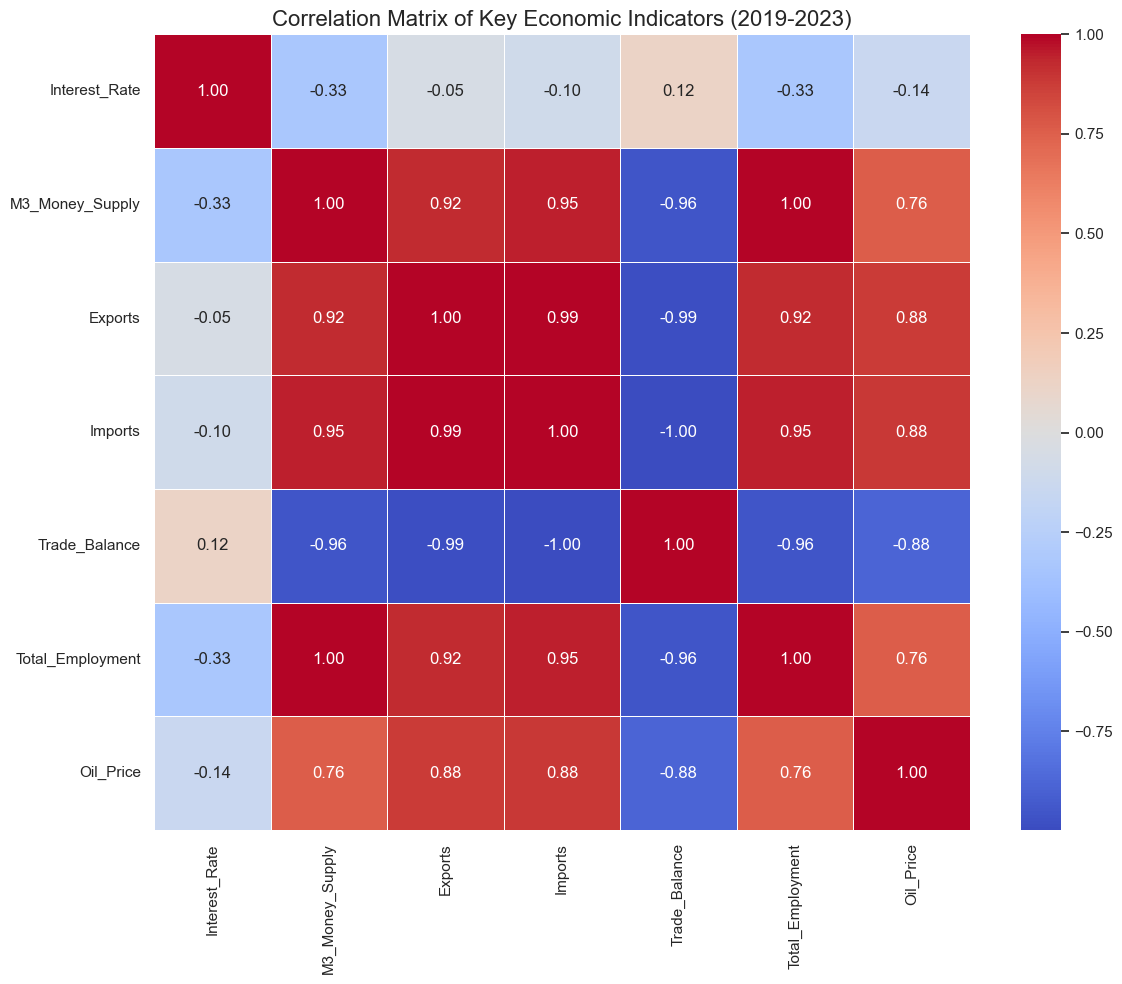

In [24]:
# Calculate correlation matrix
corr_matrix = corr_data.drop('Year', axis=1).corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Economic Indicators (2019-2023)', fontsize=16)
plt.tight_layout()
plt.show()